# ECG data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## read the data from text files

In [2]:
# import simulated data
data_simulated = pd.read_csv('./ECG_data/SimulatedECG.txt', sep=" ", header=1)
data_simulated.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

In [3]:
# import measured data
data_measured = pd.read_csv('./ECG_data/MeasuredECG.txt', sep=" ", header=1)
data_measured.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

## plot the data in one big graph

<IPython.core.display.Javascript object>


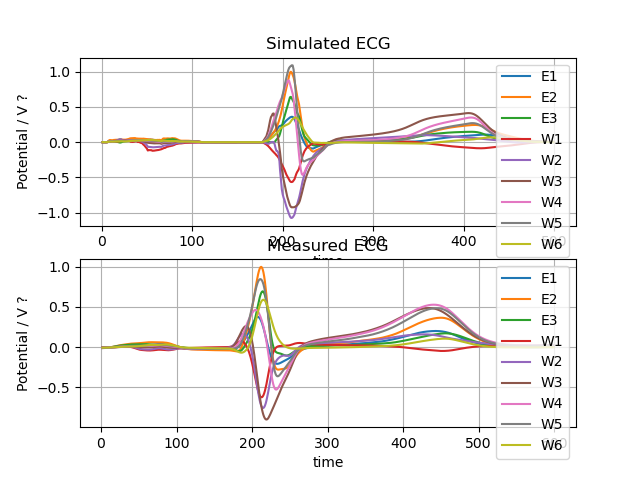

In [4]:
%matplotlib notebook
fig = plt.figure()

# plot simulated ecg data
fig.add_subplot(2, 1, 1)
plt.title('Simulated ECG')
for k, v in data_simulated.items():
    if k == 'time': continue
    plt.plot(data_simulated['time'], v, label=k)
plt.xlabel('time')
plt.ylabel('Potential / V ?')
plt.legend()
plt.grid()

# plot measured ecg data
fig.add_subplot(2, 1, 2)
plt.title('Measured ECG')
for k, v in data_measured.items():
    if k == 'time': continue
    plt.plot(data_measured['time'], v, label=k)
plt.xlabel('time')
plt.ylabel('Potential / V ?')
plt.legend()
plt.grid()

plt.show()

## Now plot every curve in a seperate graph

<IPython.core.display.Javascript object>


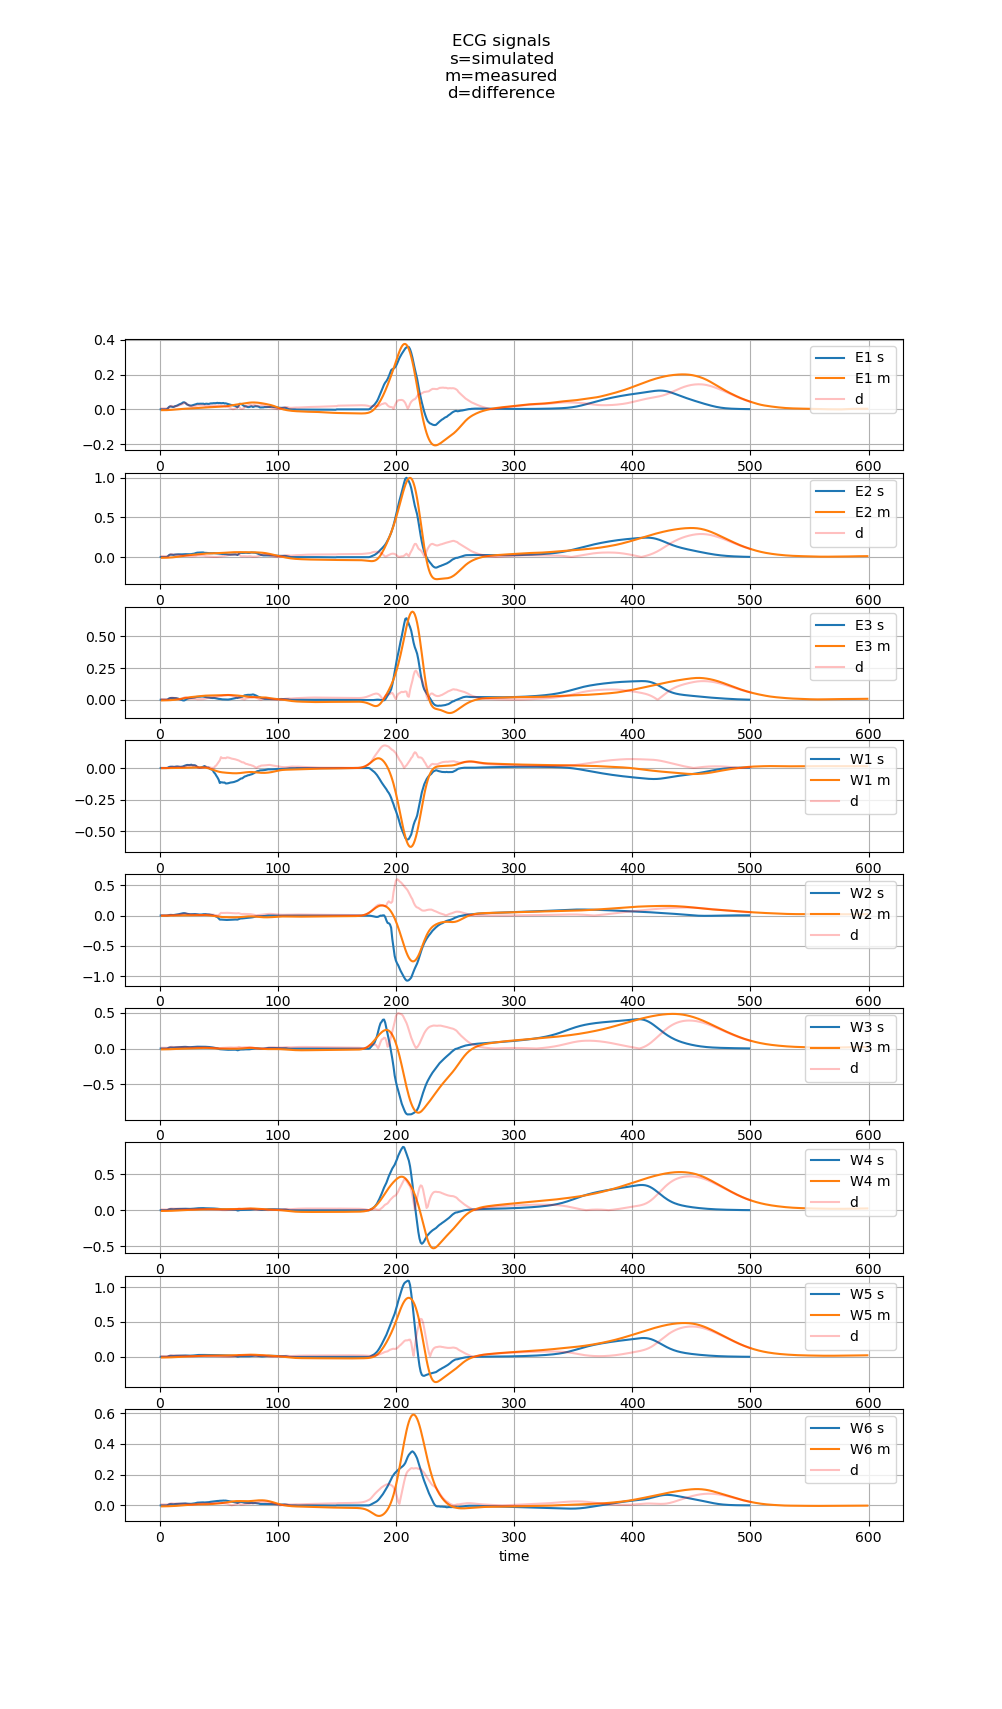

In [7]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle('ECG signals\ns=simulated\nm=measured\nd=difference')

header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']
l = len(header)
for i in range(l):
    if header[i] == 'time': continue

    fig.add_subplot(l, 1, i + 1)
    plt.plot(data_simulated['time'], data_simulated[header[i]], label=header[i] + ' s')
    plt.plot(data_measured['time'], data_measured[header[i]], label=header[i] + ' m')
    plt.plot(data_measured['time'], abs(data_simulated[header[i]] - data_measured[header[i]]), c='r', alpha=.25, label='d')
    plt.grid()
    plt.legend(loc='upper right')

plt.xlabel('time')
plt.show()

## Now analyze stochastically
The channels are composed like so:

```E1 = LA – RA```

```E2 = LL – RA```

```E3 = LL – LA```

```W1  = V1 – (LA + RA + LL)/3```

```W2  = V2 – (LA + RA + LL)/3```

```W3  = V3 – (LA + RA + LL)/3```

```W4  = V4 – (LA + RA + LL)/3```

```W5  = V5 – (LA + RA + LL)/3```

```W6  = V6 – (LA + RA + LL)/3```

We will firstly use only ```E1```, ```E2```, ```E3``` because 3D is big enough.

Also the data represents only one period. This may lead to further problems.

In [8]:
import stanpy as sp

In [9]:
# first the simulated data
#time_series = [data_simulated['E1'], data_simulated['E2'], data_simulated['E3']]
time_series = [data_measured['E1'], data_measured['E2'], data_measured['E3']]

In [10]:
dt = 1e-3

In [11]:
analysis = sp.StochasticAnalysis(time_series)

In [12]:
# custom 3D transform function
transform = lambda x, d, b: int((x + (d/2)) * np.floor(b / d)) - 50

In [13]:
# drift coefficient
_ = analysis.D_1(time_series, dt=dt, bins=100, tau=1, transform=transform)
drift = analysis.drift()

<IPython.core.display.Javascript object>


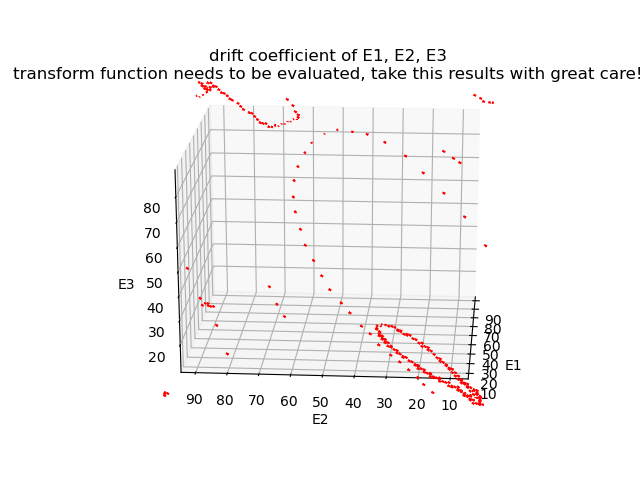

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = sp.normaxis(100, len(drift))

ax.quiver(x[0], x[1], x[2], drift[0], drift[1], drift[2], length=1, normalize=True, color='r')

ax.set_title('drift coefficient of E1, E2, E3\ntransform function needs to be evaluated, take this results with great care!')
ax.set_xlabel('E1')
ax.set_ylabel('E2')
ax.set_zlabel('E3')
plt.show()

In [121]:
# diffusion coefficient
_ = analysis.D_2(time_series, dt=dt, bins=100, tau=1, transform=transform)
diffusion = analysis.diffusion()

Diffusion is already defined. Will be overwritten by newer value.


<h1 style='color: red; position: absolute; left: 2em; top: 50%; transform: translate(0, -50%);'>[!]</h1>

### Yo, probably i made a mistake in ```stanpy.StochasticAnalysis.D_2()```.
The diffusion equals drift. That's not possible and horribly wrong. :(

I suspect a copy & paste error.

This needs to be investigated.

<IPython.core.display.Javascript object>


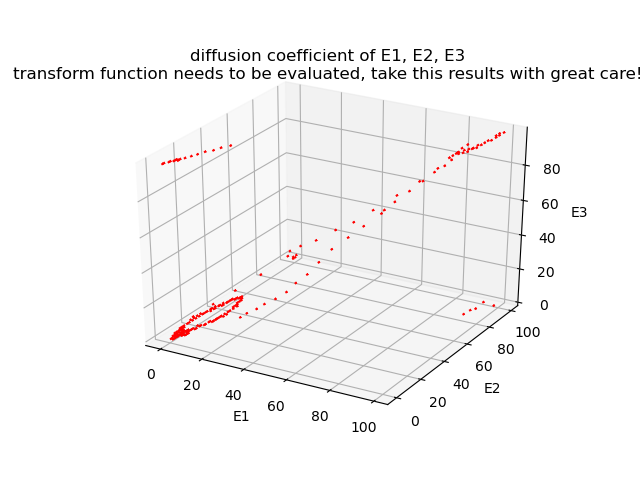

In [136]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = sp.normaxis(100, len(drift))

ax.quiver(x[0], x[1], x[2], diffusion[0], diffusion[1], diffusion[2], length=1, normalize=True, color='r')

ax.set_title('diffusion coefficient of E1, E2, E3\ntransform function needs to be evaluated, take this results with great care!')
ax.set_xlabel('E1')
ax.set_ylabel('E2')
ax.set_zlabel('E3')
plt.show()